<a href="https://colab.research.google.com/github/mwang-cmn/Floods-Prediction-Lagos-/blob/main/Floods_Prediction_Lagos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Floods Prediction - Lagos

In this notebook, I will attempt to forecast future dates when the city of Lagos, Nigeria, is likely to experience floods. An ARIMA model was fitted to this time series problem. The data used in this analysis can be found [here](https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
path = "/content/drive/MyDrive/Colab Notebooks/Floods_Prediction_Lagos/"
data = pd.read_csv(path +'weather- merged-lagos.csv',  parse_dates=[ 'datetime','sunrise', 'sunset'])
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin,flood
0,Lagos,2017-01-01,34.0,22.0,27.6,37.3,22.0,29.4,22.0,74.3,...,2017-01-01 06:57:27,2017-01-01 18:42:46,0.11,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"65210099999,DNMM,remote,65201099999",NaN,NaN,0.0
1,Lagos,2017-01-02,35.0,23.9,28.3,40.0,23.9,30.9,23.7,78.2,...,2017-01-02 06:57:52,2017-01-02 18:43:17,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999",NaN,NaN,0.0
2,Lagos,2017-01-03,34.2,24.0,28.4,37.3,24.0,30.3,22.6,73.5,...,2017-01-03 06:58:17,2017-01-03 18:43:47,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999",NaN,NaN,0.0
3,Lagos,2017-01-04,35.0,23.9,28.4,36.3,23.9,28.7,20.3,66.4,...,2017-01-04 06:58:41,2017-01-04 18:44:18,0.22,Clear,Clear conditions throughout the day.,clear-day,"65210099999,DNMM,remote,65201099999",NaN,NaN,0.0
4,Lagos,2017-01-05,34.0,22.4,27.9,38.5,22.4,30.4,22.9,76.2,...,2017-01-05 06:59:04,2017-01-05 18:44:48,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,remote,65201099999",NaN,NaN,0.0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44498 entries, 0 to 44497
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              44498 non-null  object        
 1   datetime          44498 non-null  datetime64[ns]
 2   tempmax           42134 non-null  float64       
 3   tempmin           42134 non-null  float64       
 4   temp              41206 non-null  float64       
 5   feelslikemax      42134 non-null  float64       
 6   feelslikemin      42134 non-null  float64       
 7   feelslike         41206 non-null  float64       
 8   dew               41206 non-null  float64       
 9   humidity          41206 non-null  float64       
 10  precip            41206 non-null  float64       
 11  precipprob        41206 non-null  float64       
 12  precipcover       44498 non-null  float64       
 13  preciptype        20704 non-null  object        
 14  snow              2359

In [112]:
# Summary Statistics
data.describe()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,windspeedmax,windspeedmin,flood
count,44498,42134.000000,42134.000000,41206.000000,42134.000000,42134.000000,41206.000000,41206.000000,41206.000000,41206.000000,...,30898.000000,30898.000000,30898.000000,8202.000000,43034,43034,43034.000000,1464.000000,1.464000e+03,44498.000000
mean,2015-01-20 06:39:35.621376,30.597408,23.931637,27.447580,36.067285,24.148626,30.488875,24.000078,82.715265,5.010809,...,197.393333,17.044288,7.096252,45.976103,2015-02-21 06:57:48.303573760,2015-02-21 19:05:01.889900800,0.483101,20.399180,5.867443e+06,0.010742
min,2002-01-01 00:00:00,0.000000,0.000000,21.400000,0.000000,0.000000,21.400000,8.200000,33.800000,0.000000,...,0.000000,0.000000,0.000000,10.000000,2002-01-01 06:57:21,2002-01-01 18:42:38,0.000000,0.000000,0.000000e+00,0.000000
25%,2009-08-13 00:00:00,29.100000,23.100000,26.200000,33.600000,23.100000,27.600000,23.500000,80.300000,0.000000,...,156.400000,13.500000,6.000000,30.000000,2009-05-13 06:30:35,2009-05-13 18:55:01,0.250000,13.000000,0.000000e+00,0.000000
50%,2015-10-27 00:00:00,31.100000,24.200000,27.400000,37.600000,24.100000,30.300000,24.300000,83.700000,0.000000,...,205.800000,17.800000,7.000000,60.000000,2016-02-26 07:00:05,2016-02-26 18:58:49,0.500000,16.600000,0.000000e+00,0.000000
75%,2020-11-23 00:00:00,33.100000,25.600000,28.600000,40.600000,25.600000,33.000000,25.000000,86.700000,2.000000,...,241.300000,20.800000,9.000000,60.000000,2021-01-23 07:03:56,2021-01-23 18:52:51,0.750000,24.100000,3.600000e+00,0.000000
max,2025-02-28 00:00:00,56.000000,34.600000,34.600000,56.000000,45.100000,45.100000,66.500000,100.000000,299.000000,...,303.200000,26.300000,10.000000,100.000000,2025-02-28 06:59:09,2025-02-28 18:58:51,0.980000,82.300000,2.147484e+08,1.000000
std,NaN,5.264803,4.057809,1.564409,8.048046,5.330104,3.531243,1.880426,7.185545,17.411807,...,57.718652,4.988941,1.949783,26.350427,NaN,NaN,0.288514,11.505435,3.502048e+07,0.103087


In [113]:
#Shape of data
print(f'Shape of data: {data.shape}')


Shape of data: (44498, 36)


In [114]:
print(data['sunrise'].min())
print(data['sunrise'].max())

2002-01-01 06:57:21
2025-02-28 06:59:09


In [115]:
#Check for null values % in each column
data.isnull().sum()/len(data)*100
#data.isnull().sum()


name                 0.000000
datetime             0.000000
tempmax              5.312598
tempmin              5.312598
temp                 7.398085
feelslikemax         5.312598
feelslikemin         5.312598
feelslike            7.398085
dew                  7.398085
humidity             7.398085
precip               7.398085
precipprob           7.398085
precipcover          0.000000
preciptype          53.472066
snow                46.968403
snowdepth           47.103241
windgust            25.776439
windspeed            5.375522
winddir             10.840937
sealevelpressure     9.434132
cloudcover           7.398085
visibility          10.103825
solarradiation      30.563171
solarenergy         30.563171
uvindex             30.563171
severerisk          81.567711
sunrise              3.290036
sunset               3.290036
moonphase            3.290036
conditions          10.598229
description         11.605016
icon                10.598229
stations            11.667940
windspeedm

In [122]:
data.drop_duplicates(inplace=True)

In [140]:
#Drop name column
data.drop(['name'], axis=1, inplace=True)
#rename datetime to DATE
data.rename(columns={'datetime': 'Date'}, inplace=True)
#Rename precip to Precipitation
data.rename(columns={'precip': 'Precipitation'}, inplace=True)
#set date to index
data.set_index('Date', inplace=True)




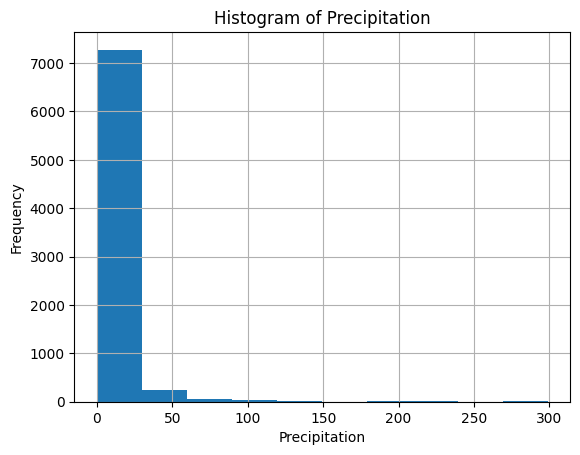

In [127]:
#histogram of precipitation
data['Precipitation'].hist()
plt.title('Histogram of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()

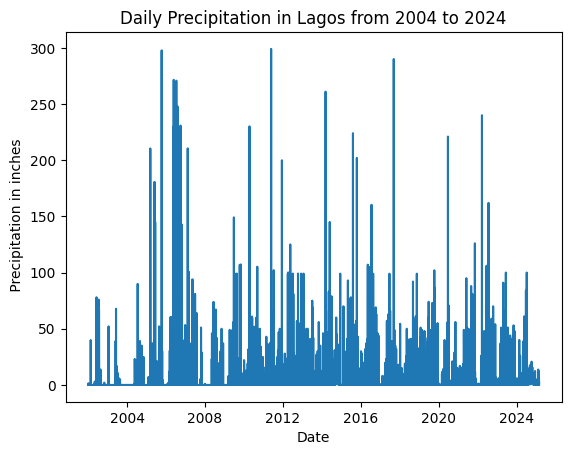

In [134]:
# Plot of precipitation from 2004 to 2024
sns.lineplot(x='Date', y='Precipitation', data=data)
plt.title('Daily Precipitation in Lagos from 2004 to 2024')
plt.xlabel('Date')
plt.ylabel(' Precipitation in inches')
plt.show()

In [130]:
monthly_data = data['Precipitation'].resample('M').mean()


Text(0, 0.5, ' Precipitation in inches')

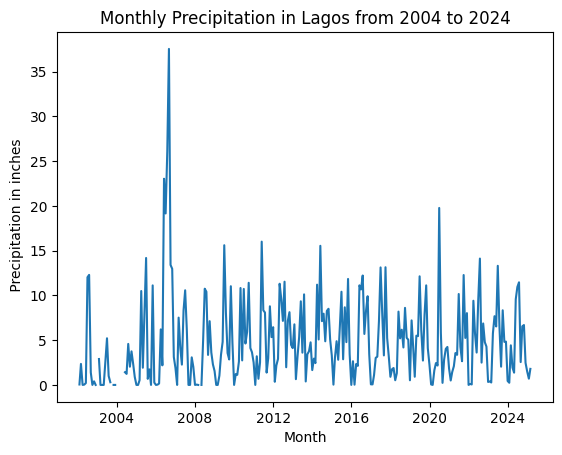

In [133]:
#Monthly precipitation in Lagos 2004 - 2024
plt.plot(monthly_data)
plt.title('Monthly Precipitation in Lagos from 2004 to 2024')
plt.xlabel('Month')
plt.ylabel(' Precipitation in inches')

In [135]:
#Arima model
from statsmodels.tsa.arima.model import ARIMA
#fit model
model = ARIMA(monthly_data, order=(5, 1, 0))
arima_model = model.fit()
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Precipitation   No. Observations:                  278
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -804.682
Date:                Mon, 08 Jul 2024   AIC                           1621.365
Time:                        11:05:37   BIC                           1643.109
Sample:                    01-31-2002   HQIC                          1630.089
                         - 02-28-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4356      0.054     -8.003      0.000      -0.542      -0.329
ar.L2         -0.2115      0.050     -4.266      0.000      -0.309      -0.114
ar.L3         -0.1393      0.050     -2.786      0.005      -0.237      -0.041
ar.L4         -0.1175      0.055     -2.122      0.034      -0.226      -0.009
ar.L5         -0.0539      0.068     -0.794      0.427      -0.187       0.079
sigma2        23.0269      1.519     15.159      0.000      20.050      26.004
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                79.18
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.76
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
# Forecast the next 12 months
forecast_steps = 12
forecast = arima_model.forecast(steps=forecast_steps)

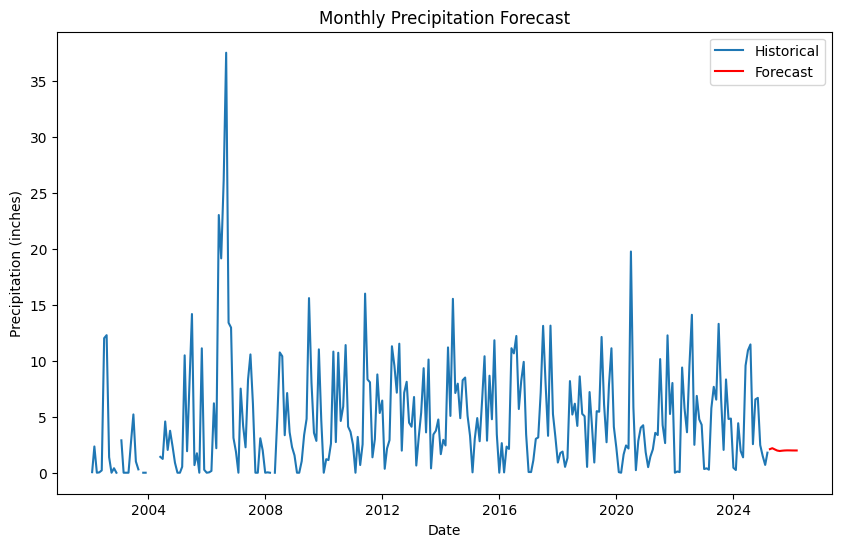

In [137]:
# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Monthly Precipitation Forecast')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

In [138]:
# Set the flood threshold
flood_threshold = 8.0
# Identify months with predicted precipitation above the threshold in the future forecast
flood_months = forecast_future[forecast_future > flood_threshold]

print("Predicted flood months:")
print(flood_months)

Predicted flood months:
2025-03-31    11.238978
2025-04-30    11.238978
2025-05-31    11.238978
2025-06-30    11.238978
2025-07-31    11.238978
2025-08-31    11.238978
2025-09-30    11.238978
2025-10-31    11.238978
2025-11-30    11.238978
2025-12-31    11.238978
2026-01-31    11.238978
2026-02-28    11.238978
Freq: M, Name: predicted_mean, dtype: float64
